## Beep maker (french: bips)
### exercise 1: TECHNO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import IPython.display as ipd

from funcs import bips as bip

from scipy.signal.windows import gaussian


<class 'numpy.ndarray'>
(44100,)


/Users/ben/githole/datamovies_ppy26/funcs/bips.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  self.oscmat[ifrx,:] = np.exp(1j*2*np.pi*f*self.t_vec) * self.env_amps[ifrx,:]


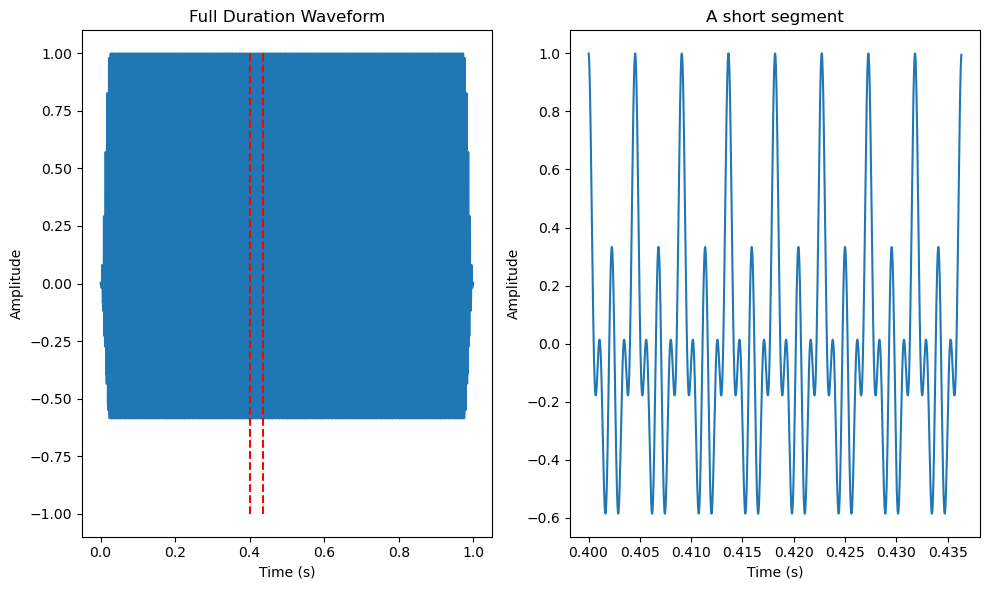

In [2]:
reload(bip)

freqs = [220,440,880]
dur = 1.0  # seconds
envs = np.ones((len(freqs), int(44100*dur)))
b = bip.beep()
b.make_bip(dur, freqs, envs) # returns normalized waveform
wf = b.wf 
# taper the waveform: 
wf = bip.taper_waveform(wf, alpha=0.05)

print(type(wf))
print(np.shape(wf))
#wf_tprd = b.taper_waveform(wf)
#plt.plot(b.t_vec, wf, color='tab:blue')
# or
#plt.plot(b.t_vec, wf, c='tab:blue')
#plt.plot(b.t_vec, wf_tprd,col='tab:red')

# MAKE THIS A TWO PANEL FIG SHOWING A FEW OSCILLATIONS... IN A PLACE OF YOUR CHOOSING..
# AND ALSO SHOW THE FULL DURATION WAVEFORM IN ANOTHER PANEL:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a few oscillations
start = 0+int(0.4*len(b.t_vec))
end = start + int(8*(1/freqs[0])*44100)  # First 4 cycles (samples)
t_short = b.t_vec[start:end]  # First 100 samples
wf_short = wf[start:end]

bip.plot_waveforms(ax1, ax2, t_short, wf_short, b.t_vec, wf)
plt.tight_layout()
plt.show()

In [3]:
# convert to audio and play (add function in bips.py to save waveform as .wav file?)
ipd.Audio(wf, rate=44100) 

### 1. MAKE THE BASS BEAT

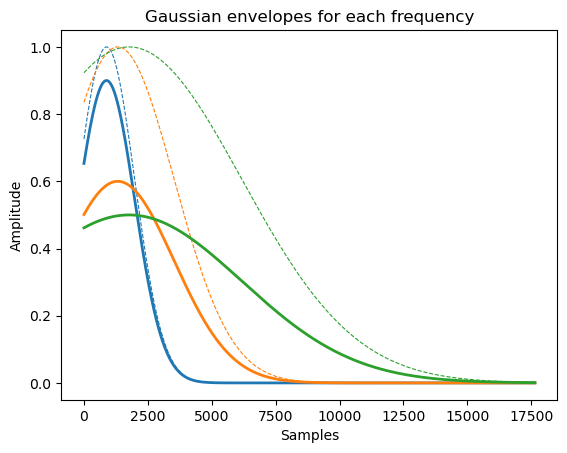

In [4]:
reload(bip)

#freqs = [220,880]
# descending frequencies
freqs = [220, 110, 55]
#freqs = [880,1760]
dur = 0.4  # seconds


# envelopes: 
# length: number of points in each window.
# std: standard deviation.
# means: list or array of mean positions to slide the Gaussian.
# Returns a 2D array: each row is a Gaussian centered at a different mean.

length = int(44100*dur)
# standard deviations (in samples)
stds = [int(length/16), int(length/8),int(length/4)]
# position in time (in samples)
means = np.linspace(0.05*length, 0.1*length, len(freqs))
# use the function in bip: 
gaussmat = bip.sliding_gaussian(length, stds, means)
weights = np.transpose([0.9, 0.6, 0.5])
# use matrix multiplication to apply per-row weights
gaussmat_w = np.diag(weights) @ gaussmat

cols = ['tab:blue','tab:orange','tab:green']
for i in range(len(freqs)):
    plt.plot(gaussmat[i,:], linestyle='--', linewidth=0.8, color=cols[i])
    plt.plot(gaussmat_w[i,:], linewidth=2.0, color=cols[i])
plt.title('Gaussian envelopes for each frequency')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


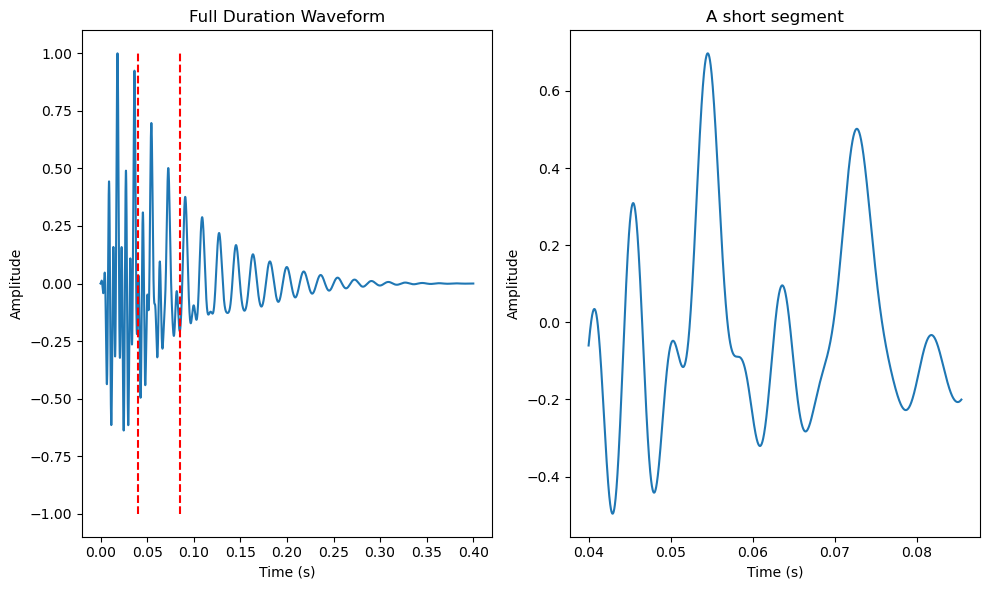

In [5]:
b = bip.beep()
b.make_bip(dur, freqs, gaussmat_w)
wf = b.wf/(np.max(np.abs(b.wf))) # normalize
# taper the waveform: 
wf = bip.taper_waveform(wf, alpha=0.05)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a few oscillations first, then the whole waveform
start = int(0.1*length)
end = start + int(10*(1/freqs[0])*44100)  # First 4 cycles (samples)
t_short = b.t_vec[start:end]  # First 100 samples
wf_short = wf[start:end]

# call the function with the existing variables
bip.plot_waveforms(ax1, ax2, t_short, wf_short, b.t_vec, wf)
plt.tight_layout()
plt.show()

In [6]:
# confirm that the waveform is normalized when converted to audio: 

ipd.Audio(wf, rate=44100) 

### 2. Create the Click

(8, 2205)


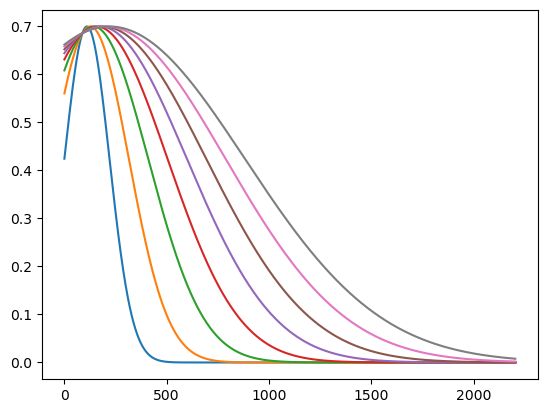

In [7]:
# now add the click: 
dur_clk = 0.05
length = int(44100*dur_clk)
freqs_clk = np.linspace(2500,5000,8)
#stds = np.ones(len(freqs_clk)) * int(length/10)
stds = np.linspace(0.05*length, 0.3*length, len(freqs_clk))
means = np.linspace(0.05*length, 0.1*length, len(freqs_clk))
gaussmat = bip.sliding_gaussian(length, stds, means)

weights = np.ones(len(freqs_clk))*0.7
gaussmat_w = np.diag(weights) @ gaussmat
print(np.shape(gaussmat_w))

#plt.plot(np.transpose(gaussmat)) 
# # why does this need to be transposed to plot correctly?
plt.plot(gaussmat_w.T)

In [8]:
b_clk = bip.beep()
b_clk.make_bip(dur_clk, freqs_clk, gaussmat_w)
clk = b_clk.wf/(np.max(np.abs(b_clk.wf))) # normalize
# taper the waveform: 
clk = bip.taper_waveform(clk, alpha=0.05)
#clk = clk[0:int(0.6*len(clk))]

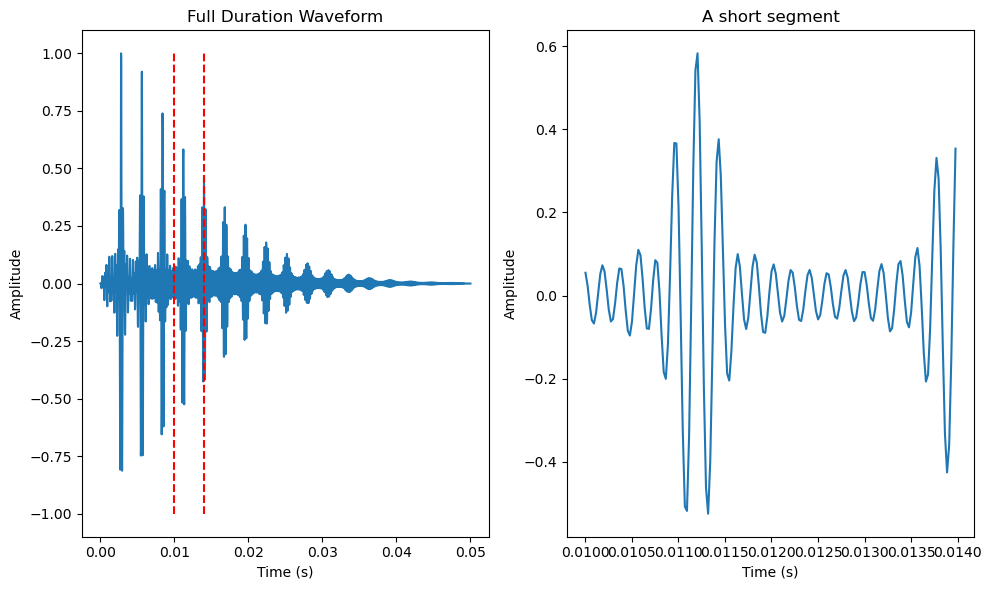

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a few oscillations first, then the whole waveform
start = int(0.2*length)
end = start + int(10*(1/freqs_clk[0])*44100)  # First 4 cycles (samples)
t_short = b_clk.t_vec[start:end]  # First 100 samples
wf_short = clk[start:end]

# call the function with the existing variables
bip.plot_waveforms(ax1, ax2, t_short, wf_short, b_clk.t_vec, clk)
plt.tight_layout()
plt.show()

In [10]:
ipd.Audio(clk, rate=44100) 

### 3. Create the soundtrack ! 
techno, level Zero ! 

In [ ]:
reload(bip)

n_measures = 4 
beats_p_meas = 4
beats_p_min = 130

track_dur = (n_measures * beats_p_meas / beats_p_min ) * 60  # seconds

track_time = np.linspace(0, track_dur, int(44100*track_dur))
track = np.zeros(len(track_time)) # initialize silent track

beat_dur = 1/beats_p_min * 60  # duration of one measure in seconds

print(track_dur)
print('number of samples:', int(44100*track_dur))

7.384615384615385
number of samples: 325661


In [12]:

start_times = np.linspace(0,n_measures*beats_p_meas-1,n_measures*beats_p_meas-1)*beat_dur

print(np.shape(track))
print(beat_dur)
print(start_times) 

start_inds = (start_times * 44100).astype(int)
for si in start_inds[0:]:
    track[si:si+len(wf)] = wf[:]


(325661,)
0.46153846153846156
[0.         0.49450549 0.98901099 1.48351648 1.97802198 2.47252747
 2.96703297 3.46153846 3.95604396 4.45054945 4.94505495 5.43956044
 5.93406593 6.42857143 6.92307692]


In [13]:
ipd.Audio(track, rate=44100) 

In [14]:
start_inds = ((start_times+0.5*beat_dur) * 44100).astype(int)
for si in start_inds[0:]:
    track[si:si+len(clk)] = 0.4*clk[:]

track = track/(np.max(np.abs(track)))

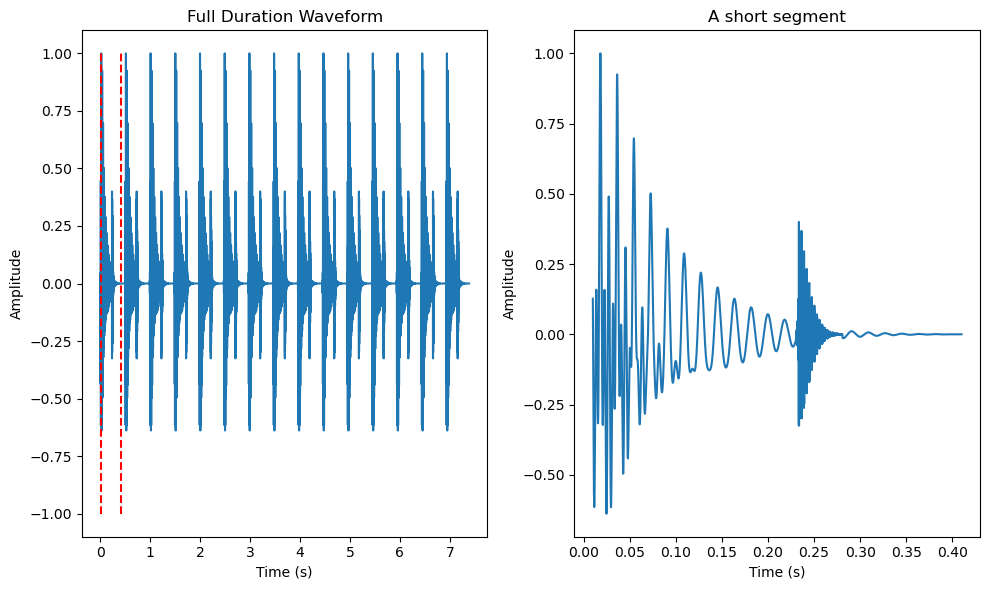

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot a few oscillations first, then the whole waveform
start = int(0.2*length)
end = start + int(0.4*44100)  # First 4 cycles (samples)
t_short = track_time[start:end]  # First 100 samples
wf_short = track[start:end]

# call the function with the existing variables
bip.plot_waveforms(ax1, ax2, t_short, wf_short, track_time, track)
plt.tight_layout()
plt.show()

In [16]:
ipd.Audio(track, rate=44100) 